In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error,r2_score

In [51]:
# Read the data
data = pd.read_csv('data/Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [52]:
## Cleaning the data

# Check for missing values
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [53]:
# Check for duplicated values
data[data.duplicated()]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


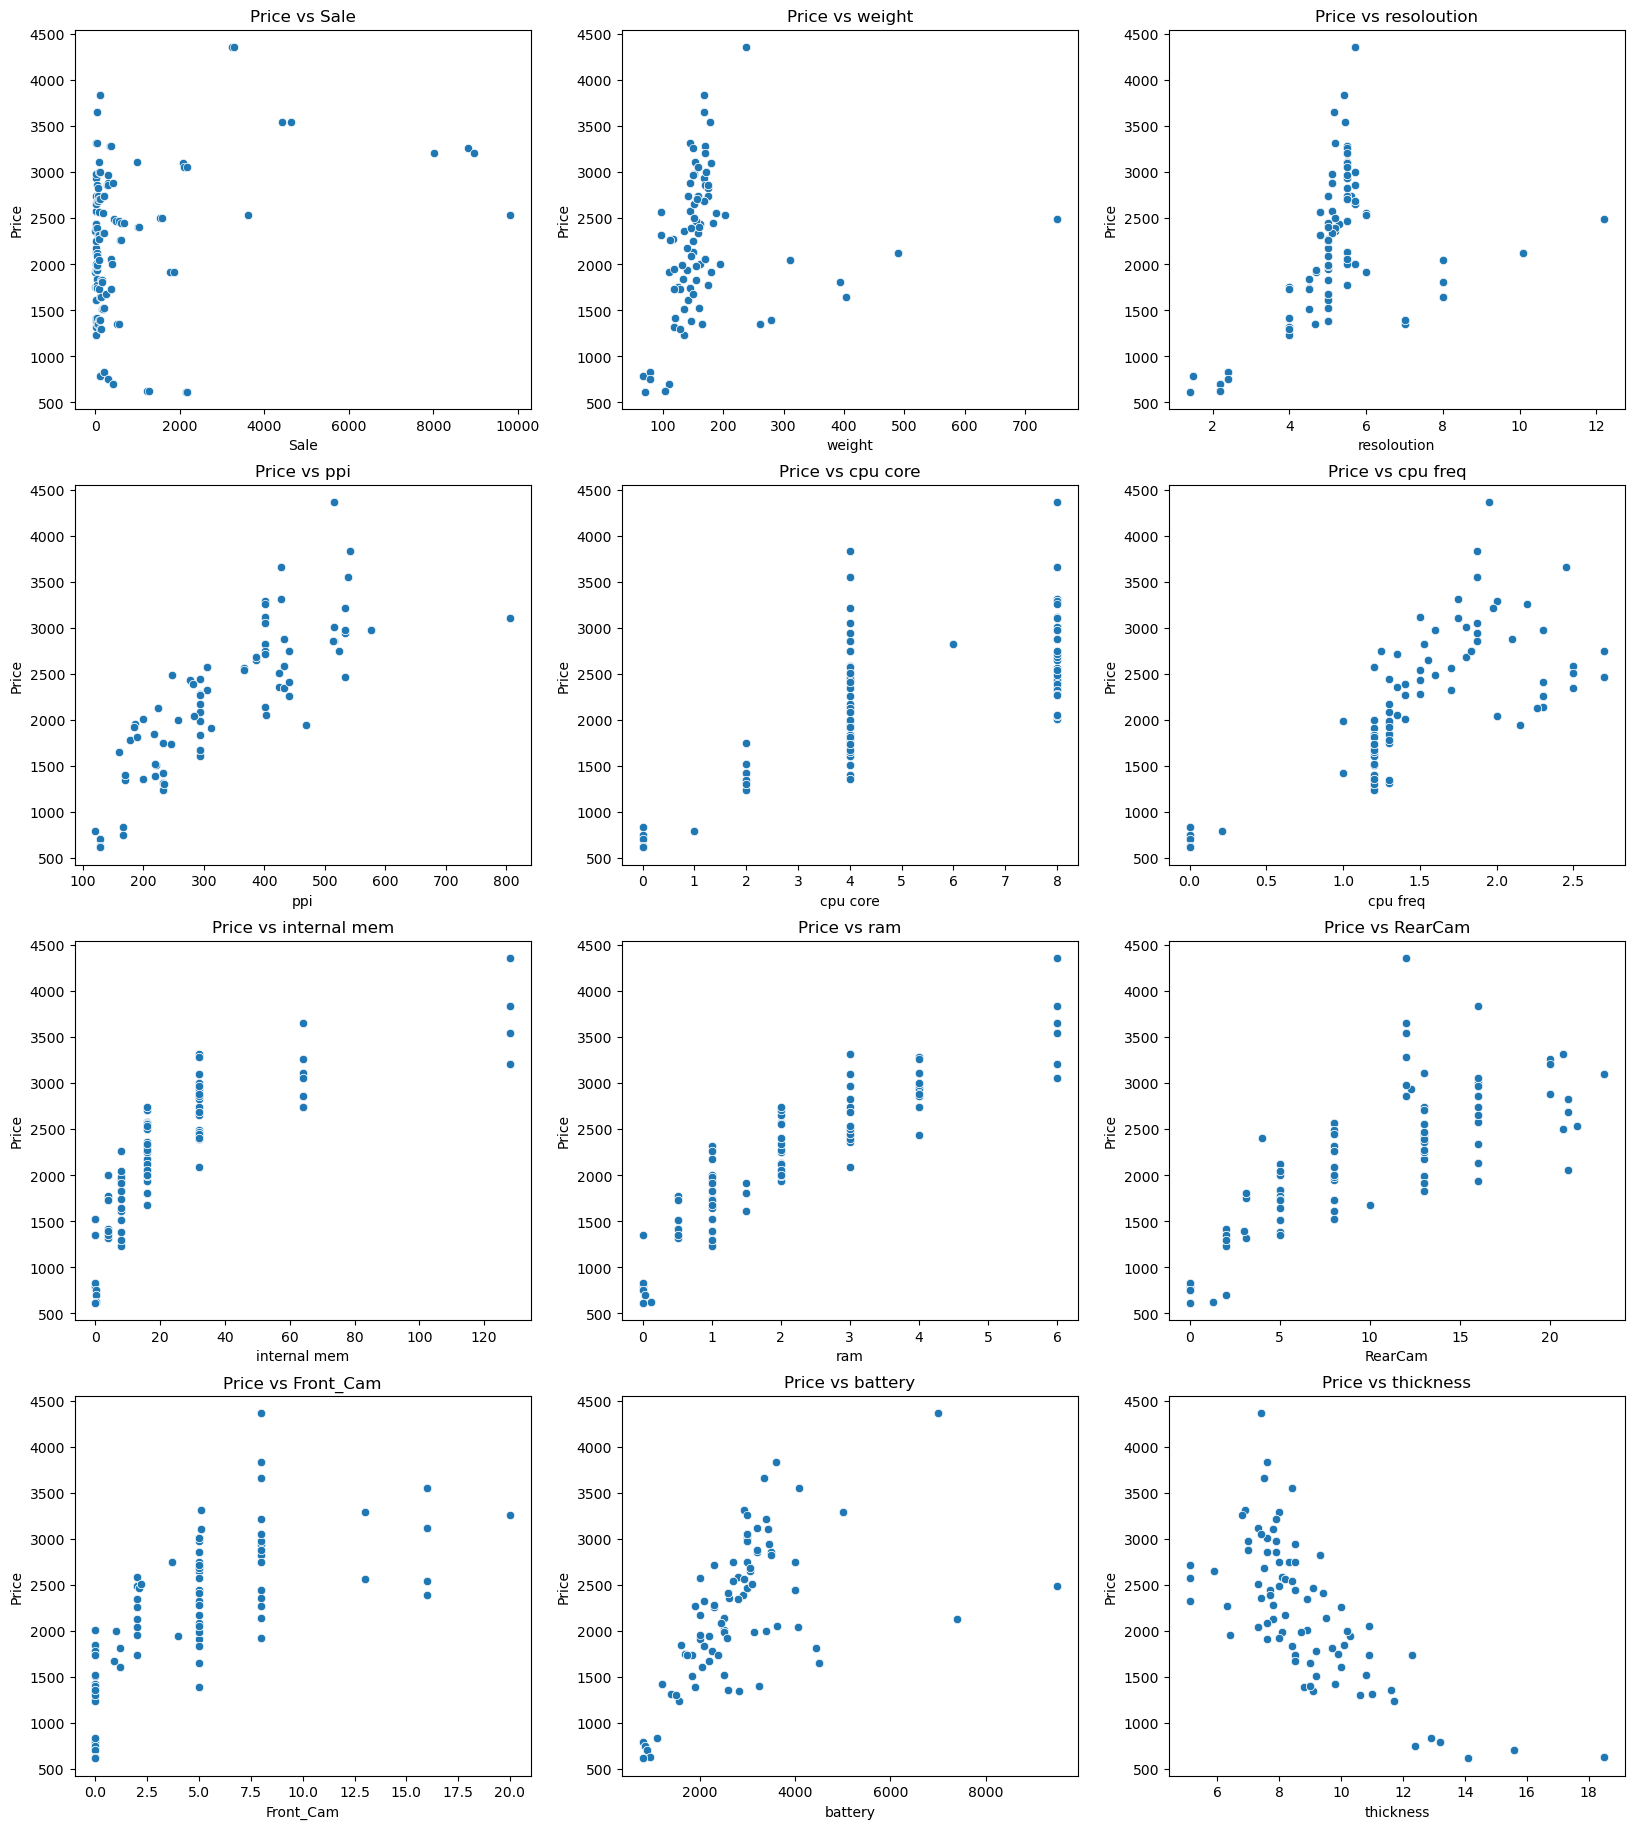

In [54]:
## Plot each feature against the target variable (Price)

# Set the size and layout of the plot grid

plt.figure(figsize=(20, 70))

# Loop through each feature in the dataset
for i, feature in enumerate(X.columns, 1):
    plt.subplot(len(X.columns), 3, i)
    sns.scatterplot(x=data[feature], y=y)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs {feature}")

plt.show()

# I think when he says the assumptions for linear regression are met, he means that the residuals are normally distributed and the other features show a 'roughly' linear relationship with the target variable.
#TODO: Check if my assumptions are correct

In [55]:
# Remove 'Product_id' column since it's not needed
data.drop('Product_id', inplace=True, axis=1)

# Seperating out the independent and dependent variables
X = data.drop("Price", axis = 1)
y = data["Price"]


In [56]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

# Using StandardScaler to standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Fit and Predict
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,predictions)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,predictions))}")

r2_score is: 0.9421396277414525
RMSE is: 136.18826981217748


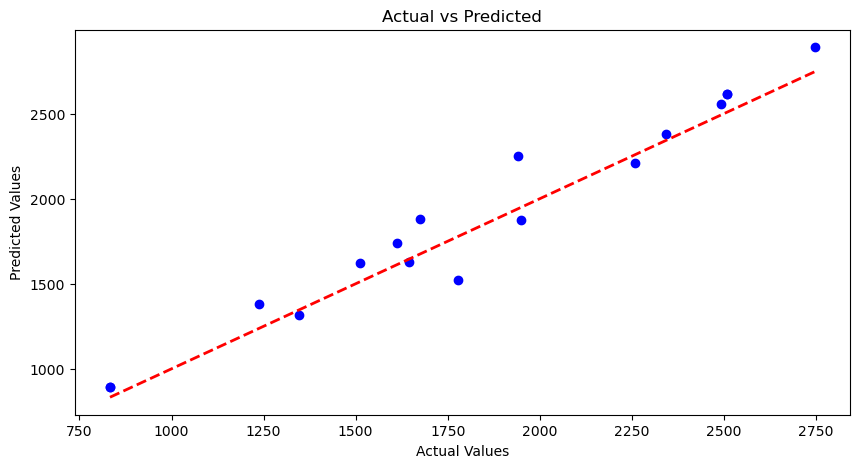

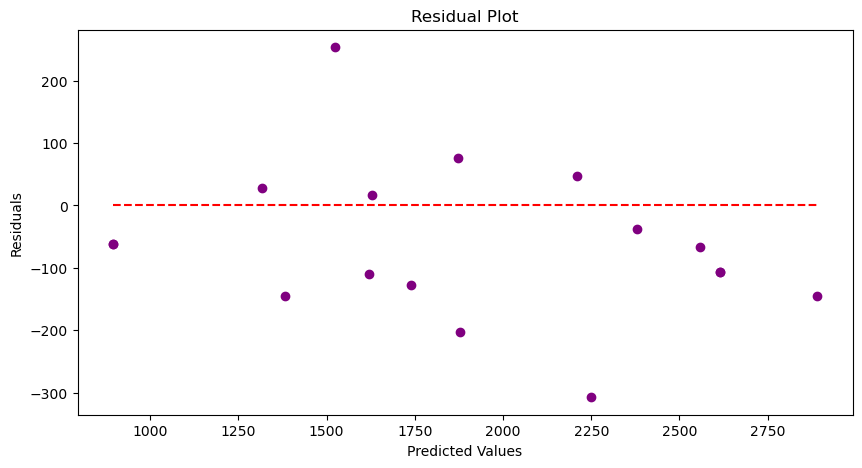

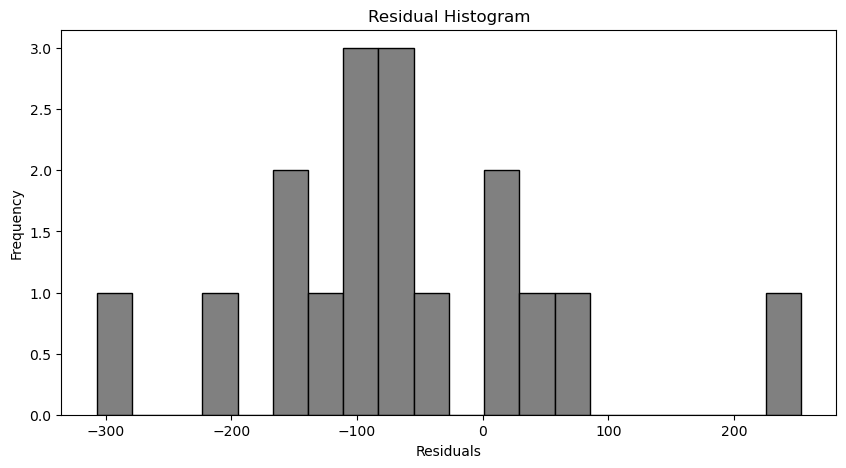

In [57]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Plotting Residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals, color='purple')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()